In [20]:
import tensorflow as tf
import numpy as np

from sklearn.preprocessing import StandardScaler

In [26]:
# Create train test data

num_examples = 1000
feature_shape = (60,5)
label_shape = (1,)

x_train = np.random.uniform(size=(num_examples,) + feature_shape) + 1000

# Scale x_train
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(num_examples, -1)).reshape(num_examples, *feature_shape)

y_train = np.random.uniform(size=(num_examples,) + label_shape)

In [17]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1),
])
model.build(x_train.shape)
model.summary()

lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (1000, 50)                11200     
                                                                 
 dense_3 (Dense)             (1000, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train)

32/32 [==============================] - 5s 15ms/step - loss: 0.0895


In [27]:
# Test data
x_test = np.random.uniform(size=(num_examples,) + feature_shape)

# Scale x_test
x_test = scaler.transform(x_test.reshape(num_examples, -1)).reshape(num_examples, *feature_shape)

y_pred = model.predict(x_test)

32/32 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Prediction keren')

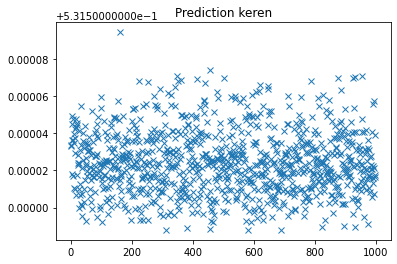

In [31]:
# Plot
import matplotlib.pyplot as plt

plt.plot(y_pred, 'x')
plt.title('Prediction keren')